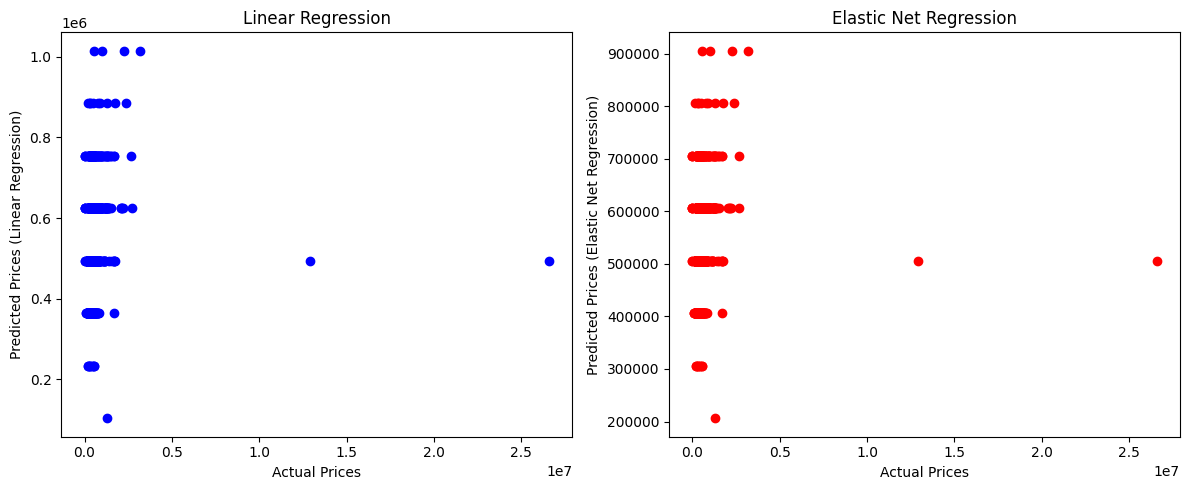

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/gopi data.csv')

X = data[['bedrooms']]
y = data['price']
# 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Create and train an Elastic Net Regression model
alpha = 0.5
l1_ratio = 0.5
elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_model.fit(X_train, y_train)

# Make predictions using Elastic Net Regression
y_pred_elastic = elastic_model.predict(X_test)

# Create scatterplots to compare predictions
plt.figure(figsize=(12, 5))

# Scatterplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Linear Regression)')
plt.title('Linear Regression')

# Scatterplot for Elastic Net Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elastic, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Elastic Net Regression)')
plt.title('Elastic Net Regression')

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('/content/gopi data.csv')
X = data[['bedrooms']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'SVM': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': Sequential([
        Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='linear')
    ]),
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

results = {}

for model_name, model in models.items():
    if model_name == 'Neural Network':
        # Compile and fit the neural network
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print()



29/29 [==============================] - 0s 2ms/step
Model: SVM
MSE: 1033450593722.7272
R-squared: -0.0133
MAE: 267159.4937

Model: KNN
MSE: 1052227573234.8247
R-squared: -0.0318
MAE: 298675.6437

Model: Neural Network
MSE: 1012910064318.3130
R-squared: 0.0068
MAE: 268064.3779

Model: Linear Regression
MSE: 1013316830372.1782
R-squared: 0.0064
MAE: 268696.3907

Model: ElasticNet
MSE: 1012633725363.8871
R-squared: 0.0071
MAE: 267922.8808



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('/content/gopi data.csv')
X = data[['bedrooms']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'SVM': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': Sequential([
        Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='linear')
    ]),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

results = {}

for model_name, model in models.items():
    if model_name == 'Neural Network':

        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae}

# results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print()


29/29 [==============================] - 0s 2ms/step
Model: SVM
MSE: 1033450593722.7272
R-squared: -0.0133
MAE: 267159.4937

Model: KNN
MSE: 1052227573234.8247
R-squared: -0.0318
MAE: 298675.6437

Model: Neural Network
MSE: 1012761902238.6439
R-squared: 0.0069
MAE: 268049.3024

Model: Linear Regression
MSE: 1013316830372.1782
R-squared: 0.0064
MAE: 268696.3907

Model: Random Forest
MSE: 1016539960064.0867
R-squared: 0.0032
MAE: 269091.1300

Model: Decision Tree
MSE: 1016211669201.4988
R-squared: 0.0036
MAE: 268740.5976

Model: ElasticNet
MSE: 1012633725363.8871
R-squared: 0.0071
MAE: 267922.8808



29/29 [==============================] - 0s 2ms/step


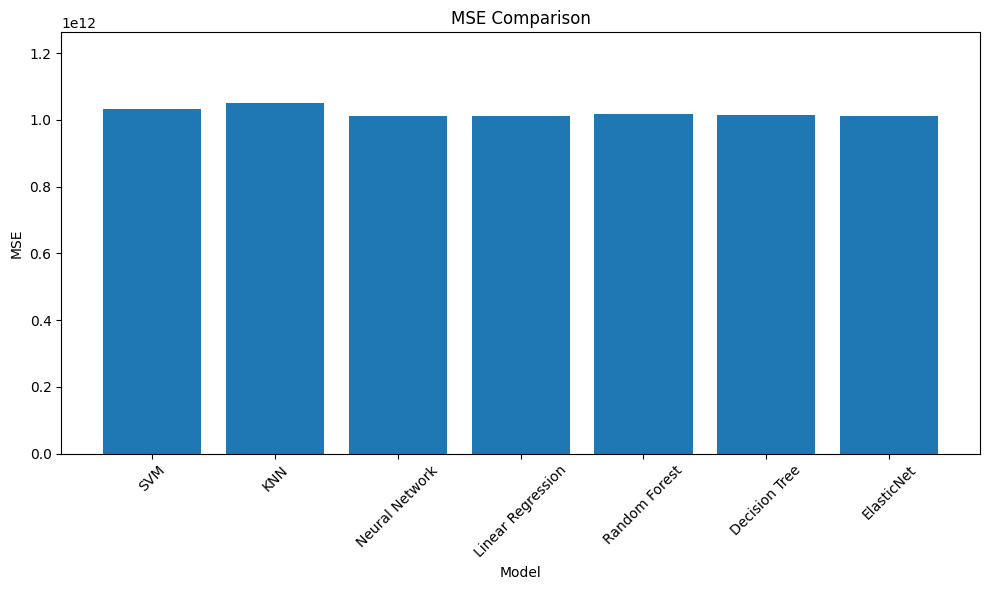

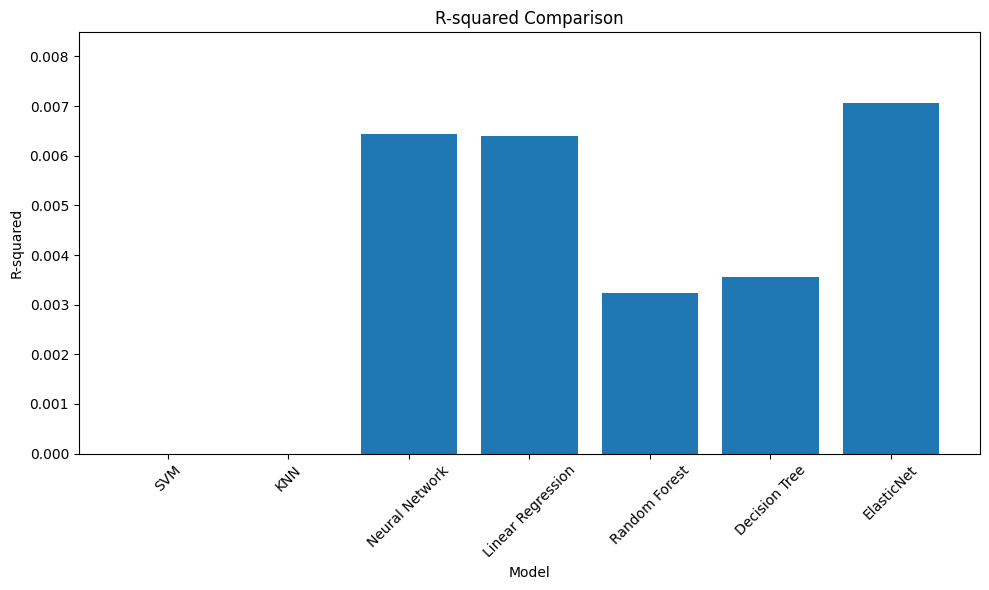

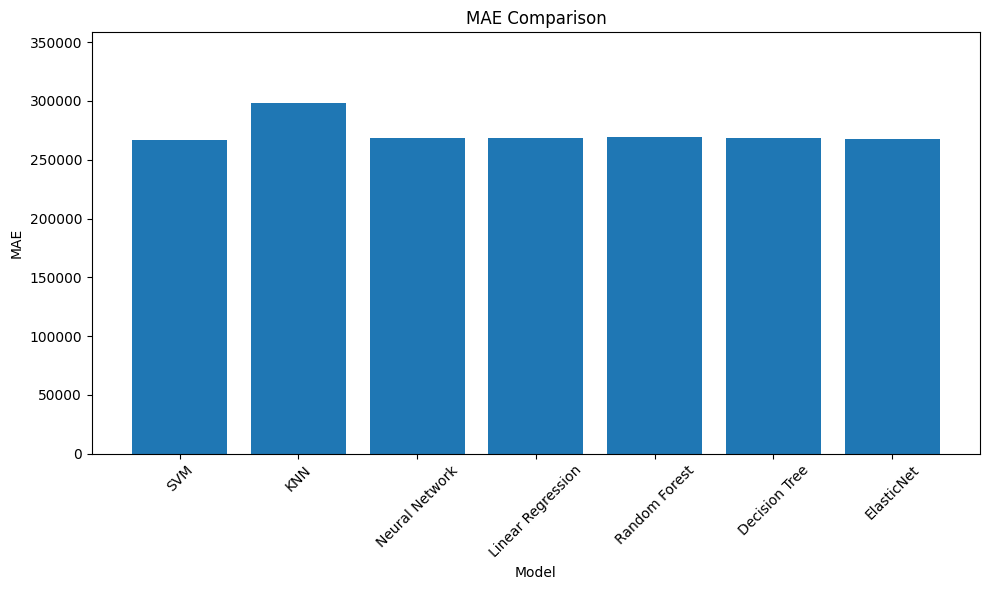

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
data = pd.read_csv('/content/gopi data.csv')

X = data[['bedrooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'SVM': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': Sequential([
        Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='linear')
    ]),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

results = {'Model': [], 'MSE': [], 'R-squared': [], 'MAE': []}

for model_name, model in models.items():
    if model_name == 'Neural Network':
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    results['MAE'].append(mae)

# bar results
metrics = ['MSE', 'R-squared', 'MAE']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results['Model'], results[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.ylim([0, max(results[metric]) * 1.2])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


29/29 [==============================] - 0s 2ms/step


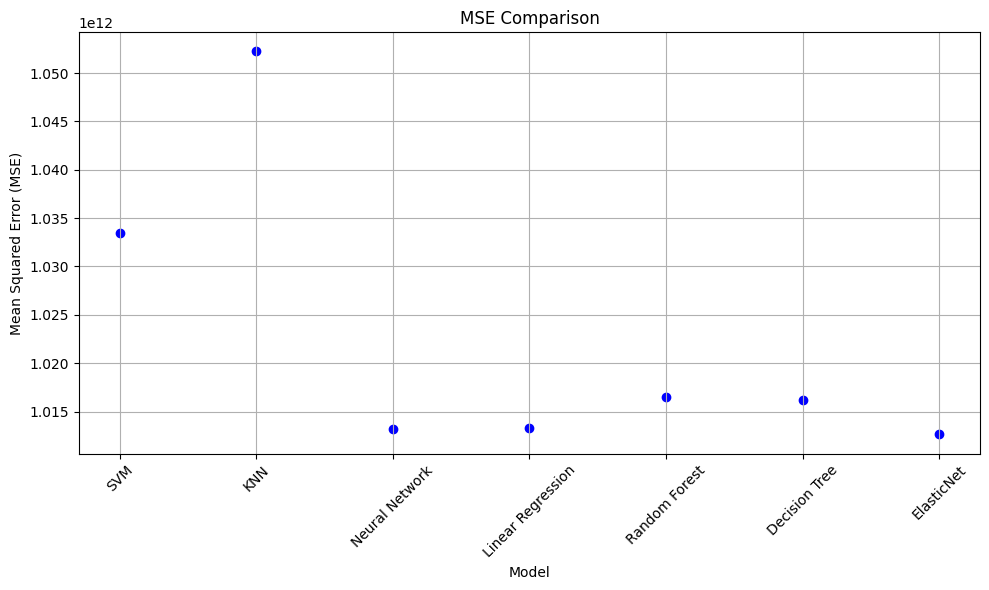

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('/content/gopi data.csv')

X = data[['bedrooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'SVM': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': Sequential([
        Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='linear')
    ]),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

mse_values = []

for model_name, model in models.items():
    if model_name == 'Neural Network':
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

#  scatter plot of MSE values
plt.figure(figsize=(10, 6))
plt.scatter(models.keys(), mse_values, c='b', marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


29/29 [==============================] - 0s 1ms/step


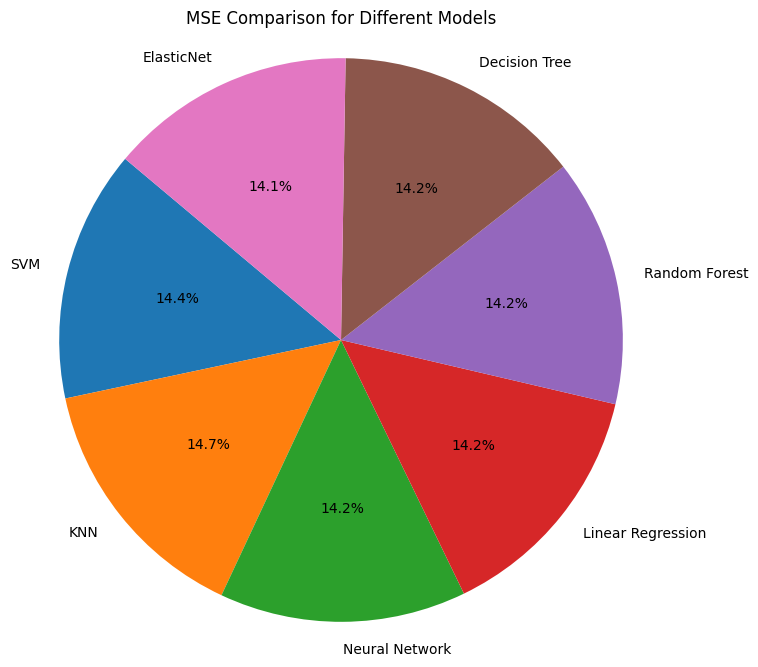

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/gopi data.csv')

X = data[['bedrooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the models
models = {
    'SVM': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': Sequential([
        Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=1, activation='linear')
    ]),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=0.5)
}

mse_values = []

for model_name, model in models.items():
    if model_name == 'Neural Network':
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

#  pie chart to compare the models based on mse
plt.figure(figsize=(8, 8))
plt.pie(mse_values, labels=models.keys(), autopct='%1.1f%%', startangle=140)
plt.title('MSE Comparison for Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
